# Times Series

In [1]:
%pylab inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pyquickhelper.ipythonhelper import add_notebook_menu
add_notebook_menu()

## Connection to the cluster

In [3]:
import os
hackathon = {}
if "CRCREDENTIALS" in os.environ:
    hackathon["blob_storage"], hackathon["password"] = os.environ["CRCREDENTIALS"].split("**")
    r = type(hackathon)
else:
    from pyquickhelper.ipythonhelper import open_html_form
    params={"blob_storage":"", "password":""}
    r = open_html_form(params=params,title="server + credentials", key_save="hackathon")
r

dict

In [4]:
blobstorage = hackathon["blob_storage"]
blobpassword = hackathon["password"]

In [5]:
cl, bs = %blob_open
cl, bs

(<pyensae.remote.azure_connection.AzureClient at 0xa145d30>,
 <azure.storage.blob.blobservice.BlobService at 0xa13a6a0>)

## Download data

In [6]:
%blob_ls croix-rouge

,name,last_modified,content_type,content_length,blob_type
0,build/SINVOICE_M.csv,"Wed, 18 Nov 2015 18:56:27 GMT",application/octet-stream,533771533,BlockBlob
1,build/Test_CRFFOR.GACCTMPD.csv,"Sun, 22 Nov 2015 21:53:38 GMT",application/octet-stream,822231942,BlockBlob
2,data/ITMMASTER.schema.txt,"Mon, 16 Nov 2015 23:00:34 GMT",application/octet-stream,5658,BlockBlob
3,data/ITMMASTER.txt,"Mon, 09 Nov 2015 21:41:00 GMT",application/octet-stream,103096479,BlockBlob
4,data/SINVOICE.schema.txt,"Mon, 16 Nov 2015 23:00:35 GMT",application/octet-stream,10252,BlockBlob
5,data/SINVOICE.txt,"Mon, 09 Nov 2015 21:42:32 GMT",application/octet-stream,1362433753,BlockBlob
6,data/SINVOICEV.schema.txt,"Mon, 16 Nov 2015 23:00:35 GMT",application/octet-stream,7999,BlockBlob
7,data/SINVOICEV.txt,"Mon, 09 Nov 2015 21:44:08 GMT",application/octet-stream,1252461865,BlockBlob
8,data/SINVOICEV_.txt,"Tue, 24 Nov 2015 15:35:49 GMT",application/octet-stream,1252461865,BlockBlob
9,data/SINVOICE_.txt,"Tue, 24 Nov 2015 15:34:54 GMT",application/octet-stream,1362433753,BlockBlob


In [7]:
%blob_down croix-rouge/data/SINVOICE.schema.txt SINVOICE.schema.txt

'SINVOICE.schema.txt'

In [9]:
import pandas
df = pandas.read_csv("SINVOICE.schema.txt", sep="\t", encoding="utf8")
df.to_excel("SINVOICE.schema.xlsx")
df.head(n=1)

,Zone,Typ,Menu,Long,Act,Dim,Intitulé normal,Intitulé abrégé,Intitulé long,Options,Table liée,Expression de lien,Copie législation,Annulation,Vérification,Obligatoire,RAZ,Mot-clé d'aide
0,SIVTYP,TSV,0,NaN,NaN,1,Type facture,Type fac,Type facture,NaN,TABSIVTYP,NaN,NaN,Bloquant,Oui,Non,Non,NaN


In [ ]:
%blob_down croix-rouge/data/SINVOICE_.txt SINVOICE_.txt

## Operations, conversion, and some others stuff

### change encoding

In [6]:
from ensae_projects.data import change_encoding
change_encoding("SINVOICE_.txt", "SINVOICE_.utf8.txt", enc1="latin-1")

1446850

In [7]:
import pyensae
%head SINVOICE_.utf8.txt --n=2

### enumerate rows as dictionary

In [7]:
from ensae_projects.data import enumerate_text_lines
def clean_column_name(s):
    return s.replace("_0", "")
for i, row in enumerate(enumerate_text_lines("SINVOICE_.utf8.txt", 
                                             encoding="utf-8", header=True, quotes_as_str=True,
                       clean_column_name=clean_column_name)):
    
    print(list(sorted(row.keys()))) 
    break
       

['ACCDAT', 'ACCNUM', 'AMTATI', 'AMTATIL', 'AMTNOT', 'AMTNOTL', 'AMTTAX', 'AMTTAXUSA', 'AMTTAX_1', 'AMTTAX_2', 'AMTTAX_3', 'AMTTAX_4', 'AMTTAX_5', 'AMTTAX_6', 'AMTTAX_7', 'AMTTAX_8', 'AMTTAX_9', 'BASTAX', 'BASTAX_1', 'BASTAX_2', 'BASTAX_3', 'BASTAX_4', 'BASTAX_5', 'BASTAX_6', 'BASTAX_7', 'BASTAX_8', 'BASTAX_9', 'BILVCR', 'BPAADDLIG', 'BPAADDLIG_1', 'BPAADDLIG_2', 'BPAINV', 'BPAPAY', 'BPR', 'BPRDAT', 'BPRFCT', 'BPRNAM', 'BPRNAM_1', 'BPRPAY', 'BPRSAC', 'BPRVCR', 'BPYADDLIG', 'BPYADDLIG_1', 'BPYADDLIG_2', 'BPYCRY', 'BPYCRYNAM', 'BPYCTY', 'BPYNAM', 'BPYNAM_1', 'BPYPOSCOD', 'BPYSAT', 'CAI', 'CCE', 'CCE_1', 'CCE_10', 'CCE_11', 'CCE_12', 'CCE_13', 'CCE_14', 'CCE_15', 'CCE_16', 'CCE_17', 'CCE_18', 'CCE_19', 'CCE_2', 'CCE_3', 'CCE_4', 'CCE_5', 'CCE_6', 'CCE_7', 'CCE_8', 'CCE_9', 'CPY', 'CREDAT', 'CREUSR', 'CRY', 'CRYNAM', 'CTY', 'CUR', 'CURLED', 'CURLED_1', 'CURLED_2', 'CURLED_3', 'CURLED_4', 'CURLED_5', 'CURLED_6', 'CURLED_7', 'CURLED_8', 'CURLED_9', 'CURTYP', 'DATVLYCAI', 'DEP', 'DES', 'DES_1'

### select a few columns and look at them

In [8]:
bigfile = enumerate_text_lines("SINVOICE_.utf8.txt", encoding="utf-8", header=True, quotes_as_str=True,
                              clean_column_name=clean_column_name, fLOG=print)

In [9]:
l = map(lambda row: { "BPR":row["BPR"], "BPRDAT":row["BPRDAT"]}, bigfile)

In [10]:
l = list(l)
len(l)

SINVOICE_.utf8.txt - 100000 lines
SINVOICE_.utf8.txt - 200000 lines
SINVOICE_.utf8.txt - 300000 lines
SINVOICE_.utf8.txt - 400000 lines
SINVOICE_.utf8.txt - 500000 lines
SINVOICE_.utf8.txt - 600000 lines
SINVOICE_.utf8.txt - 700000 lines
SINVOICE_.utf8.txt - 800000 lines
SINVOICE_.utf8.txt - 900000 lines
SINVOICE_.utf8.txt - 1000000 lines
SINVOICE_.utf8.txt - 1100000 lines
SINVOICE_.utf8.txt - 1200000 lines
SINVOICE_.utf8.txt - 1300000 lines
SINVOICE_.utf8.txt - 1400000 lines


1446850

In [11]:
import pandas
df = pandas.DataFrame(l)

In [12]:
df.head()

,BPR,BPRDAT
0,100000104,28/10/10
1,100000177,28/10/10
2,100000161,28/10/10
3,100000280,28/10/10
4,100000198,28/10/10


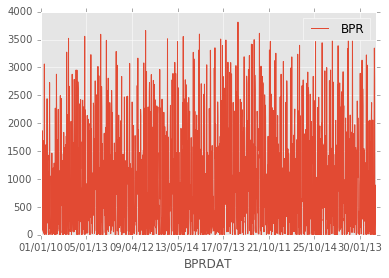

In [13]:
df.groupby("BPRDAT").count().plot()